In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
import ipywidgets as widgets
from IPython.display import display


# Load bijection results 

In [123]:
results_file = '../results/bijection method/bijection_predictions.csv'
df = pd.read_csv(results_file, index_col=0)
#df['bijection_flag'].fillna('missing')
df.dropna(subset=['bijection_flag'], inplace=True)
df.loc[~df['infeasibility_flag'].isna(),'infeasibility_flag'] = df.loc[~df['infeasibility_flag'].isna(),'infeasibility_flag'].astype('int').astype('str')
df['infeasibility_flag'] = df['infeasibility_flag'].fillna('error')
df.index.name = 'species'
df

C:\Users\diogo\AppData\Local\Temp\ipykernel_18196\4012604999.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['0' '0' '0' ... '6' '0' '4']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[~df['infeasibility_flag'].isna(),'infeasibility_flag'] = df.loc[~df['infeasibility_flag'].isna(),'infeasibility_flag'].astype('int').astype('str')


,z,kap,v,p_M,E_G,h_a,E_Hb,E_Hj,E_Hx,E_Hp,bijection_flag,feasible,infeasibility_flag,error_message
species,,,,,,,,,,,,,,
Abatus_cordatus,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000e+00,0.000000,0.000000,0.0,0.000000,error,0,error,"DGET_LJ returns a vector of length 1, but the ..."
Abbottina_rivularis,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000e+00,0.000000,0.000000,0.0,0.000000,error,0,error,"DGET_LJ returns a vector of length 1, but the ..."
Ablennes_hians,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000e+00,0.000000,0.000000,0.0,0.000000,error,0,error,"DGET_LJ returns a vector of length 1, but the ..."
Abra_segmentum,0.305030,0.930000,0.020926,25.2041,2349.9631,7.505000e-07,0.000601,0.011460,0.0,10.940000,0,1,0,NaN
Abralia_trigonura,0.106340,0.980810,0.009515,1009.8108,5492.3580,1.526000e-10,0.001511,2.628000,0.0,14.090000,0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zosterisessor_ophiocephalus,5.198448,0.977711,0.020435,17.1271,5231.3551,1.513000e-07,0.003948,0.000000,0.0,1559.246677,6a,1,0,NaN
Zosterops_lateralis,1.378718,0.975580,0.035919,617.3516,7324.4923,2.674000e-12,76.538733,456.800000,456.8,131.037604,3,1,0,NaN
Zosterops_virens,1.273027,0.990600,0.031028,734.2559,7319.8077,3.005000e-12,NaN,101.400000,101.4,103.153128,3,0,6,NaN


In [27]:
df['bijection_flag'].unique()

array(['error', '0', '3', 'timeout', '5', '6a', '4', '6', '2', '98', '8',
       '9'], dtype=object)

In [29]:
df['bijection_flag'].value_counts()

bijection_flag
0           353
2            63
3          1757
4           445
5           368
6           171
6a          387
8            47
9             7
98           21
error       869
timeout     208
Name: count, dtype: int64

C:\Users\diogo\AppData\Local\Temp\ipykernel_18196\57194128.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=bijection_flag_counts.values, x=bijection_flag_counts.index.values, palette=10*['blue'] + ['red', 'gray'], ax=ax)


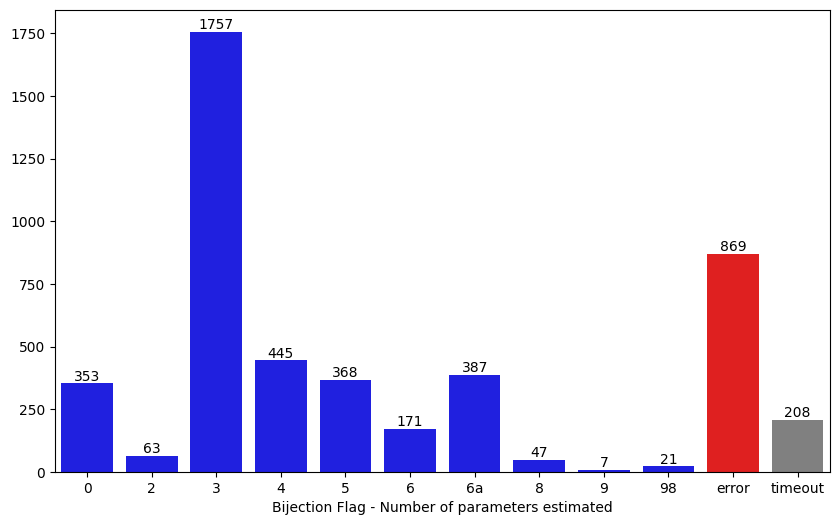

In [60]:
fig, ax = plt.subplots(figsize=(10, 6))
bijection_flag_counts = df['bijection_flag'].value_counts().sort_index()
sns.barplot(y=bijection_flag_counts.values, x=bijection_flag_counts.index.values, palette=10*['blue'] + ['red', 'gray'], ax=ax)
ax.set_xlabel('Bijection Flag - Number of parameters estimated')
for i in range(12):
    ax.bar_label(ax.containers[i])

In [38]:
df['error_message'].value_counts()

error_message
Output argument "flag" (and possibly others) not assigned a value in the execution with "get_pars" function.                                                                                                                                                                                               357
FZERO cannot continue because supplied function_handle ==> fnget_kap failed with the error below.   Integration interval contains NaN.                                                                                                                                                                     142
FZERO cannot continue because supplied function_handle ==> fnget_kap failed with the error below.   Matrix dimensions must agree.                                                                                                                                                                           82
Second argument must be finite.                                              

In [50]:
ne_df = df[~df['bijection_flag'].isin(['error', 'timeout'])].copy()
ne_df['infeasibility_flag'] = ne_df['infeasibility_flag'].astype('int').astype('str')
ne_df

,z,kap,v,p_M,E_G,h_a,E_Hb,E_Hj,E_Hx,E_Hp,bijection_flag,feasible,infeasibility_flag,error_message
species,,,,,,,,,,,,,,
Abra_segmentum,0.305030,0.930000,0.020926,25.2041,2349.9631,7.505000e-07,0.000601,0.011460,0.0,10.940000,0,1,0,NaN
Abralia_trigonura,0.106340,0.980810,0.009515,1009.8108,5492.3580,1.526000e-10,0.001511,2.628000,0.0,14.090000,0,1,0,NaN
Abraliopsis_morisii,4.995600,0.615040,0.020611,17.8381,5492.4179,2.598000e-05,0.954000,8.970000,0.0,1127.000000,0,1,0,NaN
Abroscopus_superciliaris,1.182222,0.958220,0.034790,533.0640,7316.5423,4.147000e-12,110.347681,631.400000,631.4,82.616552,3,0,4,NaN
Acanthaster_planci,0.560350,0.510280,0.000449,14.6234,2352.8882,1.947000e-09,0.000147,0.039240,0.0,5171.000000,0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zosterisessor_ophiocephalus,5.198448,0.977711,0.020435,17.1271,5231.3551,1.513000e-07,0.003948,0.000000,0.0,1559.246677,6a,1,0,NaN
Zosterops_lateralis,1.378718,0.975580,0.035919,617.3516,7324.4923,2.674000e-12,76.538733,456.800000,456.8,131.037604,3,1,0,NaN
Zosterops_virens,1.273027,0.990600,0.031028,734.2559,7319.8077,3.005000e-12,NaN,101.400000,101.4,103.153128,3,0,6,NaN


C:\Users\diogo\AppData\Local\Temp\ipykernel_18196\2494413614.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=infeasibility_flag_counts.values, x=['Feasible', 'Non-positive \nparameters', 'Maturities are not\n increasing', 'Puberty cannot \nbe reached', 'Birth cannot \nbe reached'], palette=['green'] + 4*['red'], ax=ax)


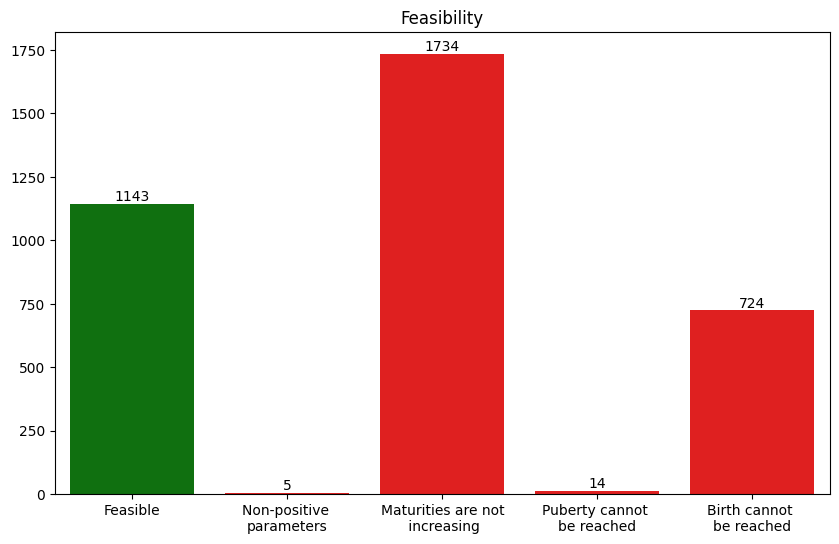

In [59]:
fig, ax = plt.subplots(figsize=(10, 6))
infeasibility_flag_counts = df['infeasibility_flag'].value_counts().sort_index()
sns.barplot(y=infeasibility_flag_counts.values, x=['Feasible', 'Non-positive \nparameters', 'Maturities are not\n increasing', 'Puberty cannot \nbe reached', 'Birth cannot \nbe reached'], palette=['green'] + 4*['red'], ax=ax)
ax.set_title('Feasibility')
for i in range(len(infeasibility_flag_counts)):
    ax.bar_label(ax.containers[i])

In [44]:
infeasibility_flag_counts

infeasibility_flag
0.0    1143
1.0       5
4.0    1734
5.0      14
6.0     724
Name: count, dtype: int64

# Feasibility for test set of dasaset

In [62]:
import sys
import os

# Add the 'project' directory to the path
sys.path.append(os.path.abspath('..'))

from project_code.data.load_data import load_col_types, load_data
from project_code.data.prepare_data_sklearn import get_features_targets, get_single_output_col_types
from project_code.utils.results import get_best_model_file
from project_code.evaluate.score import mean_deb_loss

In [124]:
dataset_name = 'ratio_output_no_pub_weight'
dataset_name += '_taxonomy'
dataset_name += '_ecocodes'

# Load the data
dataset_folder = f'../data/processed/'
results_folder = f'../results/{dataset_name}'
dfs = load_data(dataset_name=dataset_name, data_split='train_test', dataset_folder=dataset_folder)
col_types = load_col_types(dataset_name=dataset_name, dataset_folder=dataset_folder)
data = get_features_targets(dfs, col_types)

In [125]:
bijection_feas_df = pd.DataFrame(columns=['data_split',], index=list(dfs['train'].index.values)+list(dfs['test'].index.values))
bijection_feas_df.index.name = 'species'
for ds in ('train', 'test'):
    bijection_feas_df.loc[dfs[ds].index, 'data_split'] = ds
    bijection_feas_df.loc[dfs[ds].index, ['feasible','infeasibility_flag','error_message']] = df.loc[dfs[ds].index, ['feasible','infeasibility_flag','error_message']]
bijection_feas_df

,data_split,feasible,infeasibility_flag,error_message
species,,,,
Bufo_japonicus,train,0.0,error,FZERO cannot continue because supplied functio...
Geronticus_eremita,train,0.0,6,NaN
Archboldia_papuensis,train,0.0,6,NaN
Gopherus_agassizii,train,0.0,error,FZERO cannot continue because supplied functio...
Chlorodrepanis_virens,train,0.0,4,NaN
...,...,...,...,...
Rallus_elegans,test,0.0,6,NaN
Emys_orbicularis,test,1.0,0,NaN
Pristis_perotteti,test,0.0,error,"Output argument ""flag"" (and possibly others) n..."


In [128]:
infeasibility_flag_to_text = {
    '0': 'Feasible',
    '1': 'Non-positive \nparameters', 
    '2': 'Efficiency larger than 1\n or smaller than 0',
    '3': 'Growth effieciency\n larger than 1',
    '4': 'Maturities are not\n increasing',
    '5': 'Puberty cannot \nbe reached',
    '6': 'Birth cannot \nbe reached',
    'error': 'Error'
}
infeasibility_text_to_color = {
    'Feasible': 'green',
    'Non-positive \nparameters': 'red', 
    'Efficiency larger than 1\n or smaller than 0': 'red',
    'Growth effieciency\n larger than 1': 'red',
    'Maturities are not\n increasing': 'red',
    'Puberty cannot \nbe reached': 'red',
    'Birth cannot \nbe reached': 'red',
    'Error': 'gray'
}


fc = bijection_feas_df[['data_split', 'infeasibility_flag']].value_counts().sort_index()
fc = fc.reset_index()
fc['infeasibility_flag'] = fc['infeasibility_flag'].map(infeasibility_flag_to_text)
fc

,data_split,infeasibility_flag,count
0,test,Feasible,45
1,test,Non-positive \nparameters,1
2,test,Maturities are not\n increasing,34
3,test,Puberty cannot \nbe reached,1
4,test,Birth cannot \nbe reached,98
5,test,Error,54
6,train,Feasible,264
7,train,Non-positive \nparameters,1
8,train,Maturities are not\n increasing,148
9,train,Puberty cannot \nbe reached,1


In [129]:
bijection_feas_df.to_csv(f"{results_folder}/feasibility/BijectionMethod_feasibility.csv")

C:\Users\diogo\AppData\Local\Temp\ipykernel_18196\707238498.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
C:\Users\diogo\AppData\Local\Temp\ipykernel_18196\707238498.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)


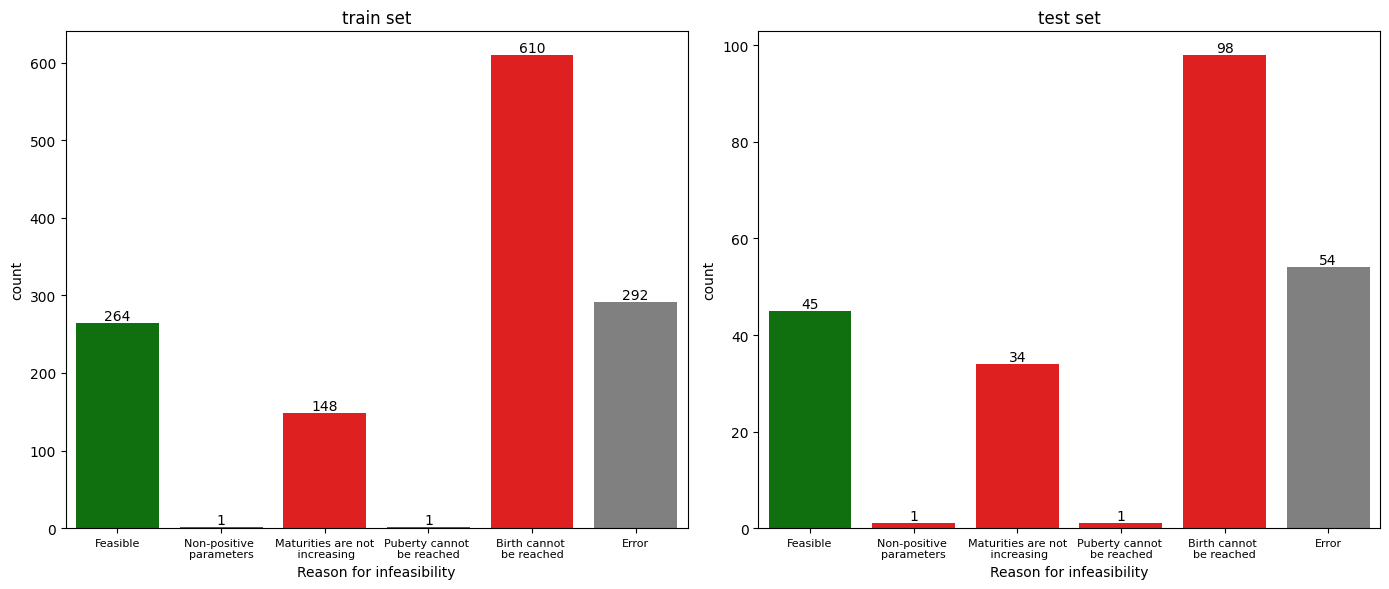

In [143]:
def plot_feasibility_results(feas_df):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), tight_layout=True)
    
    for i, ds in enumerate(['train', 'test']):
        ax = axes[i]
        feasible_counts = feas_df[feas_df['data_split'] == ds]['infeasibility_flag'].value_counts().sort_index().reset_index()
        feasible_counts['infeasibility_flag'] = feasible_counts['infeasibility_flag'].map(infeasibility_flag_to_text)
        sns.barplot(data=feasible_counts, x='infeasibility_flag', y='count', hue='infeasibility_flag',palette=infeasibility_text_to_color, ax=ax)
        ax.set_title(f'{ds} set')
        ax.set_xlabel('Reason for infeasibility')
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
        for j in range(len(feasible_counts)):
            ax.bar_label(ax.containers[j])
            
plot_feasibility_results(bijection_feas_df)